# Wave equation
[<!-- module-mse2 badge --><span class="module module-mse2">Mathematics for Scientists and Engineers 2</span>](module-mse2) 

```{index} Wave equation
```

Finally we consider a hyperbolic PDE: the simple wave equation

$$ u_{tt} = c^2 \nabla^2 u $$

where $ u $ is the displacement of the string. Since the wave equation is second order in time, we will require two initial conditions. We can also write it using the d'Alembert (or *box*) operator $ \Box \equiv \frac{1}{c^2} \partial_{tt} - \nabla^2 $ as $ \Box u = 0 $.

(wave_interpretation)=
## Physical interpretation

Since $ u $ represents displacement of the string, then $ u_{tt} $ is the acceleration of a point due to tension. So the acceleration of a point is proportional to the concavity at the point, which is related to $ \nabla^2 $ - the larger the concavity, the larger the acceleration is.

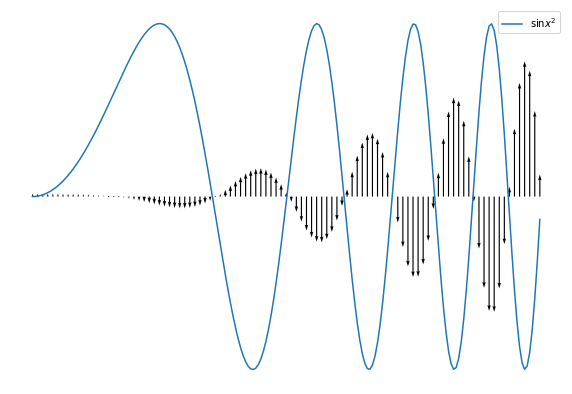

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 5, 201)

u = np.sin(x**2)
u_xx = 2*np.cos(x**2) - 4*x**2*np.sin(x**2)
u_xx /= u_xx.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

ax.plot(x, u, label=r'$\sin x^2$')
ax.quiver(x[::2], u[::2]*0, 0, u_xx[::2], units='xy', width=0.01)

ax.legend(loc='best')
ax.axis('off')
plt.show()

(wave_dalembert)=
## D'Alembert's formula

```{index} D'Alembert's formula
```

We showed in a previous notebook that the general solution of the 1 + 1-D wave equation $ u_{tt} = c^2 u_{xx} $ can always be written in the form

$$ u(t, x) = f(x - ct) + g(x + ct) $$

 What this tells us is that every solution of the wave equations consists of two parts: one moving in the positive x-direction and the other in the negative x-direction, both with velocity $ c $. 

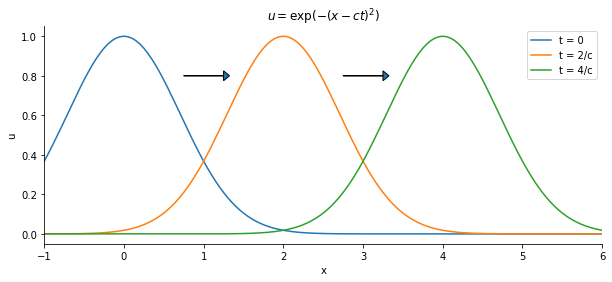

In [2]:
x = np.linspace(-2, 8, 201)

u0 = np.exp(-x**2)
u1 = np.exp(-(x-2)**2)
u2 = np.exp(-(x-4)**2)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax.plot(x, u0, label='t = 0')
ax.plot(x, u1, label='t = 2/c')
ax.plot(x, u2, label='t = 4/c')

ax.arrow(0.75, 0.8, 0.5, 0, head_width=0.05)
ax.arrow(2.75, 0.8, 0.5, 0, head_width=0.05)

ax.set_title(r'$u = \exp (- (x-ct)^2)$')
ax.set_xlabel('x')
ax.set_ylabel('u')

ax.set_xlim(-1, 6)
ax.legend(loc='best')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Now consider an **infinite** string and two general initial conditions, the first for initial displacement $ u $ and the second for initial vertical velocity $ u_t $:

$$ u(0, x) = h(x) \\ u_t(0, x) = v(x) $$

As we would with ODEs, we substitute our general solution into these:

$$ u(0, x) = f(x) + g(x) = h(x) \\
u_t(0, x) = -c f' (x) + c g' (x) = v(x) $$ 

We divide by $ c $ and integrate the second equation along $ x $ coordinate:

$$ -f + g + K = \frac{1}{c} \int_{x_0}^{x} v(s) \ ds $$

where $ K = f(x_0) - g(x_0) $. So we have a system of two equations:

$$ f(x) + g(x) = h(x) \\
-f(x) + g(x) = -K + \frac{1}{c} \int_{x_0}^{x} v(s) \ ds $$

Which we easily solve for $ f $ and $ g $:

$$ f(x) = \frac{1}{2} \big( h(x) + K \big) - \frac{1}{2c} \int_{x_0}^x v(s) \ ds \\
g(x) = \frac{1}{2} \big( h(x) - K \big) + \frac{1}{2c} \int_{x_0}^x v(s) \ ds $$

So the solution is

$$ \begin{aligned} 
u(t, x) &= f(x-ct) + g(x+ct) \\
&= \frac{1}{2} \big( h(x-ct) + K \big) - \frac{1}{2c} \int_{x_0}^{x-ct} v(s) \ ds + \frac{1}{2} \big( h(x+ct) - K \big) + \frac{1}{2c} \int_{x_0}^{x+ct} v(s) \ ds
\end{aligned} $$

Which we tidy up to get the **d'Alembert's formula**:

$$ u(t, x) = \frac{1}{2} \big( h(x-ct) + h(x+ct) \big) + \frac{1}{2c} \int_{x-ct}^{x+ct} v(s) \ ds $$

### Example

Farlow 1993, p.135, problem 3: What is the solution to the initial-value problem

$$ \begin{aligned}
& u_{tt} = u_{xx}, \qquad -\infty < x < \infty, 0 < t < \infty \\
& u(0, x) = \exp(-x^2) \\
& u_t(0, x) = 0
\end{aligned} $$

Following the d'Alembert's formula, we find that the solution is

$$ u(t, x) = \frac{1}{2} \big( e^{-(x-t)^2} + e^{-(x+t)^2} \big) $$

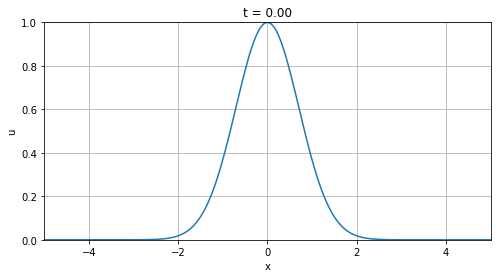

In [7]:
import matplotlib.animation as animation
from IPython.display import HTML


def u(t, x):
    return 0.5 * (np.exp(-(x-t)**2) + np.exp(-(x+t)**2))


x = np.linspace(-5, 5, 201)
yy = [u(i*0.05, x) for i in range(151)]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

def animate(i):
    ax.clear()
    ax.plot(x,yy[i])
    ax.set_xlim((-5, 5))
    ax.set_ylim((0, 1))
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_title(f't = {i*0.05:.2f}')
    ax.grid(True)
    
    
anim = animation.FuncAnimation(fig,animate,frames=150,interval=30)
plt.show()

HTML(anim.to_html5_video())

Notice that, as we mentioned earlier, we have two parts: one moving to the left and one to the right with speed $ c = 1 $.